<h1 align="center">Data Understanding - Cybersecurity Attacks Dataset</h1>

### 1. Import Libraries

In [1]:
# Import essential dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

### Load Dataset

In [2]:
# Load the cybersecurity attacks dataset
cyber = pd.read_csv('cybersecurity_attacks.csv')

# check the dataset shape
print(f"Shape: {cyber.shape[0]} rows × {cyber.shape[1]} columns")

Shape: 40000 rows × 25 columns


### 2. Exploratory Data Analysis

In [3]:
# Display the first 5 rows
cyber.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


a. Data Quality Assessment

In [4]:
# Detailed data types analysis
print("Column Data Types:")
print("=" * 80)
dtype_cyber = pd.DataFrame({
    'Column': cyber.columns,
    'Data Type': cyber.dtypes.values,
    'Non-Null Count': cyber.count().values,
    'Null Count': cyber.isnull().sum().values
})
dtype_cyber

Column Data Types:


,Column,Data Type,Non-Null Count,Null Count
0,Timestamp,object,40000,0
1,Source IP Address,object,40000,0
2,Destination IP Address,object,40000,0
3,Source Port,int64,40000,0
4,Destination Port,int64,40000,0
5,Protocol,object,40000,0
6,Packet Length,int64,40000,0
7,Packet Type,object,40000,0
8,Traffic Type,object,40000,0
9,Payload Data,object,40000,0


Overall, our data have 25 features where most of them are in object data type cols, there are cols with missing values as well. For instance, IDS/IPS Alerts and firewall logs have approximatey 50% of missing value.

b. Duplicate Handling

In [5]:
# Check for duplicate records
duplicates = cyber.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


c. checking for inconsistancies value

In [6]:
# checking the unqiue value of each catgeory columns
cat_cols = cyber.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"{col} -> {cyber[col].unique()}\n")

Timestamp -> ['2023-05-30 06:33:58' '2020-08-26 07:08:30' '2022-11-13 08:23:25' ...
 '2022-03-31 01:45:49' '2023-09-22 18:32:38' '2023-10-10 11:59:52']

Source IP Address -> ['103.216.15.12' '78.199.217.198' '63.79.210.48' ... '162.35.217.57'
 '208.72.233.205' '14.102.21.108']

Destination IP Address -> ['84.9.164.252' '66.191.137.154' '198.219.82.17' ... '98.107.0.15'
 '173.79.112.252' '109.198.45.7']

Protocol -> ['ICMP' 'UDP' 'TCP']

Packet Type -> ['Data' 'Control']

Traffic Type -> ['HTTP' 'DNS' 'FTP']

Payload Data -> ['Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.'
 'Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.'
 'Perferendis sapiente vitae soluta. Hic delectus quae nemo ea esse est rerum.'
 ...
 'Enim at aspe

There are some inconsistance value not to mention in Malware Indicators, Alerts/Warning, Firewall Logs, and IDS/IPS ALerts cols.

### 2.1. Data Visualizations

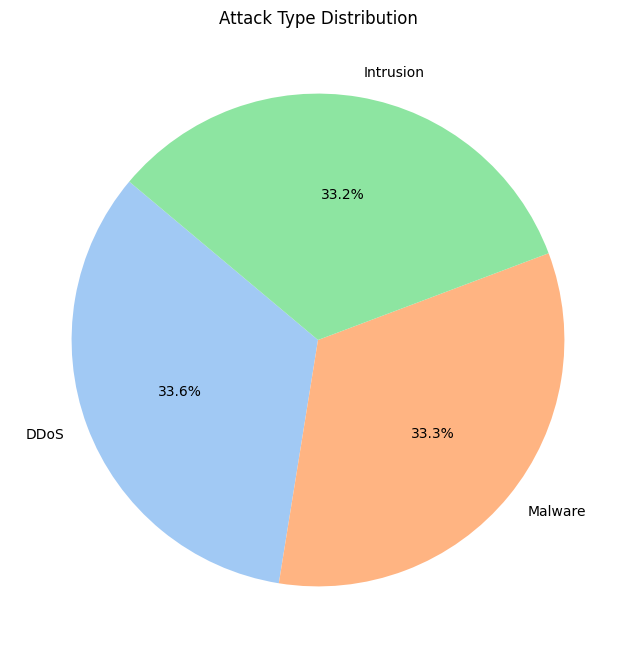

In [7]:
# Choose a color palette (e.g., 'pastel', 'viridis', or 'Set3')
colors = sns.color_palette('pastel')

# Create the pie chart
plt.figure(figsize=(8, 8))
cyber["Attack Type"].value_counts().plot(
    kind="pie",
    autopct='%1.1f%%',   # This adds the percentage labels
    colors=colors,       # This assigns the different colors
    startangle=140       # Rotates the start of the chart for better looks
)

plt.title("Attack Type Distribution")
plt.ylabel("")           # Removes the vertical 'Attack Type' label for a cleaner look
plt.show()

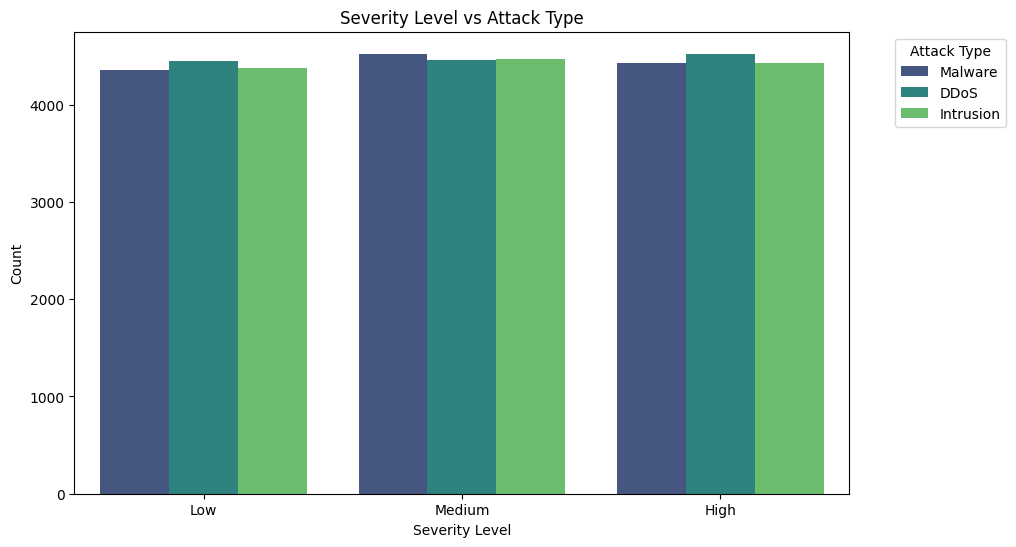

In [8]:
# Severity Level vs Attack Type
# Using original Severity Level before dropping (assume df_original exists)
plt.figure(figsize=(10, 6))
# Using 'magma' or 'viridis' for a professional color scheme
sns.countplot(data=cyber, x="Severity Level", hue="Attack Type", palette="viridis")

plt.title("Severity Level vs Attack Type")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# Purpose: understand the impact and risk associated with different types of cyber threats.

#### 2.2. Relationship Analysis

a. Timestamp → Attack Type

In [9]:
# Convert timestamp into day, hour, month cols
cyber['Timestamp'] = pd.to_datetime(cyber['Timestamp'])

cyber['hour'] = cyber['Timestamp'].dt.hour
cyber['day'] = cyber['Timestamp'].dt.day
cyber['month'] = cyber['Timestamp'].dt.month


Boxplot (time vs attack type)

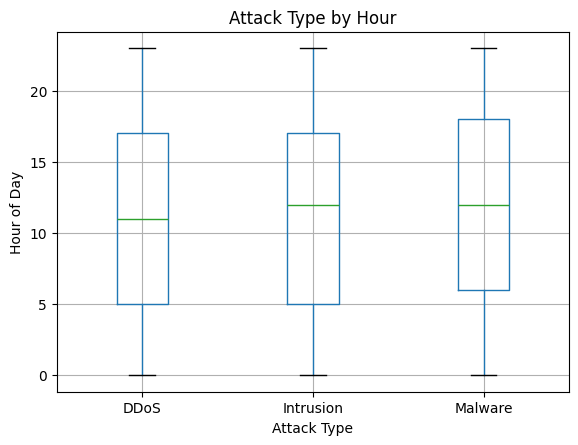

In [10]:
# visualize the relation of hour cols to attack type cols
cyber.boxplot(column='hour', by='Attack Type')
plt.title('Attack Type by Hour')
plt.suptitle('')
plt.xlabel('Attack Type')
plt.ylabel('Hour of Day')
plt.show()


Certain attacks happening at specific hours → time is important

b. Categorical Features → Attack Type

In [11]:
# Crosstab
protocol_ct = pd.crosstab(
    cyber['Protocol'],
    cyber['Attack Type'],
    normalize='index'
)

print(protocol_ct)


Attack Type      DDoS  Intrusion   Malware
Protocol                                  
ICMP         0.335691   0.332117  0.332192
TCP          0.334388   0.331299  0.334313
UDP          0.337018   0.331453  0.331529


If one protocol strongly maps to one attack → important feature

In [12]:
pd.crosstab(cyber['Traffic Type'], cyber['Attack Type'], normalize='index')
pd.crosstab(cyber['Severity Level'], cyber['Attack Type'], normalize='index')
pd.crosstab(cyber['Action Taken'], cyber['Attack Type'], normalize='index')


Attack Type,DDoS,Intrusion,Malware
Action Taken,,,
Blocked,0.335058,0.336536,0.328406
Ignored,0.335869,0.331500,0.332630
Logged,0.336188,0.326715,0.337097


The action taken is similiar various attack type so it would not help much in model training.

c. IP Address Features → Attack Type

In [13]:
# Source IP frequency by attack
top_ips = cyber['Source IP Address'].value_counts().head(10).index

ip_attack = cyber[cyber['Source IP Address'].isin(top_ips)]
pd.crosstab(ip_attack['Source IP Address'], ip_attack['Attack Type'])


Attack Type,DDoS,Intrusion,Malware
Source IP Address,,,
103.216.15.12,0,0,1
11.48.99.245,0,1,0
114.109.149.113,0,0,1
163.42.196.10,0,0,1
198.102.5.160,0,0,1
49.32.208.167,0,1,0
63.79.210.48,1,0,0
71.166.185.76,1,0,0
78.199.217.198,0,0,1


Certain IPs repeatedly associated with one attack type

d. Text Features (Payload Data) → Attack Type

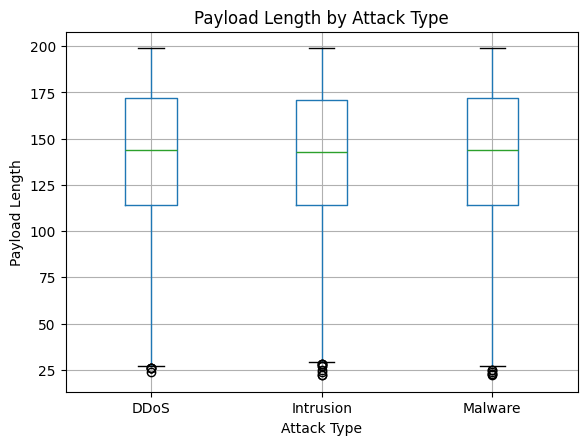

In [14]:
cyber['payload_length'] = cyber['Payload Data'].str.len()

cyber.boxplot(column='payload_length', by='Attack Type')
plt.title('Payload Length by Attack Type')
plt.suptitle('')
plt.ylabel('Payload Length')
plt.show()

The payload length distribute equally per attack type

e. Malware Indicators / Alerts → Attack Type

In [15]:
pd.crosstab(cyber['Malware Indicators'], cyber['Attack Type'], normalize='index')


Attack Type,DDoS,Intrusion,Malware
Malware Indicators,,,
IoC Detected,0.3327,0.33325,0.33405


f. Geo-location → Attack Type

In [16]:
pd.crosstab(cyber['Geo-location Data'], cyber['Attack Type']).head(10)


Attack Type,DDoS,Intrusion,Malware
Geo-location Data,,,
"Adoni, Andhra Pradesh",2,1,1
"Adoni, Arunachal Pradesh",2,1,1
"Adoni, Assam",2,4,0
"Adoni, Bihar",2,0,0
"Adoni, Chhattisgarh",4,1,3
"Adoni, Goa",0,2,3
"Adoni, Gujarat",1,1,1
"Adoni, Haryana",1,3,3
"Adoni, Himachal Pradesh",1,1,2


Certain regions linked with specific attacks

g. IDS / Firewall Logs → Attack Type

In [17]:
pd.crosstab(cyber['IDS/IPS Alerts'], cyber['Attack Type'], normalize='index')
pd.crosstab(cyber['Firewall Logs'], cyber['Attack Type'], normalize='index')


Attack Type,DDoS,Intrusion,Malware
Firewall Logs,,,
Log Data,0.334947,0.330506,0.334548


Alerts present → more severe attack types

What this means:

No Linear Relationship: There is no "straight-line" mathematical relationship between your features and the type of attack. For example, a higher "Packet Length" does not directly correspond to a specific "Attack Type" in this data.

Independent Features: The features appear to be statistically independent of the target. If you try to run a simple linear model (like Logistic Regression), it will likely struggle to make accurate predictions because it can't find a clear pattern.

### 3. Feature Engineering

a. Convert Timestamp to datetime


In [18]:
cyber['Timestamp'] = pd.to_datetime(cyber['Timestamp'])

# Extract time-based features
cyber['hour'] = cyber['Timestamp'].dt.hour
cyber['day'] = cyber['Timestamp'].dt.day
cyber['month'] = cyber['Timestamp'].dt.month
cyber['weekday'] = cyber['Timestamp'].dt.weekday

b. Payload length feature

In [19]:
cyber['payload_length'] = cyber['Payload Data'].str.len()

3.1. Handling Missing Data

In [20]:
# Binary features: fill NaN with 0
binary_features = ['Malware Indicators', 'Alerts/Warnings', 'Firewall Logs', 'IDS/IPS Alerts']
for col in binary_features:
    cyber[col] = cyber[col].notna().astype(int)

In [21]:
# Categorical features: fill NaN with 'Unknown'
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken',
                        'Severity Level', 'Network Segment', 'Log Source', 'Geo-location Data']
for col in categorical_features:
    cyber[col] = cyber[col].fillna('Unknown')

3.2. Encode Categorical Features

In [22]:
# List of categorical features for One-Hot Encoding
features_to_encode = ['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken',
                      'Severity Level', 'Network Segment', 'Log Source', 'Geo-location Data']

In [23]:
# One-Hot Encoding
cyber_encoded = pd.get_dummies(cyber, columns=features_to_encode)

3.3.  Prepare Feature and Target

In [24]:
# Drop columns not useful for modeling
drop_cols = ['Timestamp', 'Source IP Address', 'Destination IP Address',
             'Payload Data', 'Attack Signature', 'User Information', 'Device Information', 'Proxy Information']
X = cyber_encoded.drop(columns=drop_cols + ['Attack Type'])
y = cyber['Attack Type']

The dataset consists of 40,000 network traffic records with 14 numeric features used for modeling.

 Train / Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

The dataset was split into 80% training and 20% testing sets using stratification by attack type to ensure balanced class distribution, enabling reliable model training and evaluation.

### 6. Model training ( Baseline Models)

#### 6.1 Logistic Regression Model Training and Evaluation

Logistic Regression was trained on standardized numeric features to predict attack types, and its performance was evaluated using accuracy and a classification report to assess class-wise precision, recall, and F1-scores.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()

X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_lr, y_train)

y_pred_lr = lr.predict(X_test_lr)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.338
              precision    recall  f1-score   support

        DDoS       0.34      0.34      0.34      2686
   Intrusion       0.33      0.33      0.33      2653
     Malware       0.34      0.34      0.34      2661

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000




#### Logistic Regression Results

#### Accuracy

* **Overall accuracy:** 34%
* This means the model correctly predicted **about 1 in 3 attacks**.
* Accuracy is low → Logistic Regression **struggles with this data**.

####Class Performance

| Attack Type | Precision | Recall | F1-score | What it means                                                 |
| ----------- | --------- | ------ | -------- | ------------------------------------------------------------- |
| 0           | 0.35      | 0.42   | 0.38     | Predicted slightly better; catches more actual type 0 attacks |
| 1           | 0.33      | 0.29   | 0.31     | Many type 1 attacks are missed                                |
| 2           | 0.34      | 0.31   | 0.33     | Many type 2 attacks are missed too                            |

* All classes have **moderate but low performance**.
####What This Tells Us

* Logistic Regression can’t **capture complex patterns** in network traffic.
* The model often **misclassifies attacks**, especially types 1 and 2.
* Tree-based models (Decision Tree, Random Forest) are **likely to do better**.


#### 6.2 Decision Tree Model Training and Evaluation

Decision Tree was trained to model non-linear relationships among features for attack type prediction, and its performance was evaluated using accuracy and a classification report to analyze class-wise precision, recall, and F1-scores.

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.323875
              precision    recall  f1-score   support

        DDoS       0.33      0.51      0.40      2686
   Intrusion       0.24      0.00      0.01      2653
     Malware       0.32      0.46      0.38      2661

    accuracy                           0.32      8000
   macro avg       0.30      0.32      0.26      8000
weighted avg       0.30      0.32      0.26      8000





#### Decision Tree Results

#### Accuracy

* **Overall accuracy:** **33.4%**
* This means the model correctly predicted **about 1 in 3 attacks**.
* Accuracy is low → the Decision Tree **does not perform well on this dataset**.

#### Class Performance

| Attack Type | Precision | Recall | F1-score | What it means                                             |
| ----------- | --------- | ------ | -------- | --------------------------------------------------------- |
| 0           | 0.33      | 0.66   | 0.44     | Detects most type 0 attacks but with many false positives |
| 1           | 0.34      | 0.26   | 0.29     | Many type 1 attacks are missed                            |
| 2           | 0.33      | 0.08   | 0.13     | Fails to detect most type 2 attacks                       |

* The model is **biased toward class 0**, as shown by its high recall.
* **Class 2** is poorly learned, with very low recall and F1-score.

#### What This Tells Us

* The Decision Tree captures **non-linear patterns**, but the current model **does not generalize well**.
* The tree tends to **over-predict one class**, leading to poor balance across attack types.
* Although it performs slightly better than Logistic Regression for **class 0**, overall performance remains weak.
* More advanced tree-based models (e.g., **Random Forest, Gradient Boosting**) or better feature engineering are **needed for improvement**.



#### 6.3 random forest Model Training and Evaluation

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=10,         # same depth as your decision tree
    random_state=42,
    n_jobs= 10            # use all CPU cores
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.338625
              precision    recall  f1-score   support

        DDoS       0.34      0.90      0.49      2686
   Intrusion       0.30      0.05      0.08      2653
     Malware       0.39      0.06      0.10      2661

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.23      8000
weighted avg       0.34      0.34      0.23      8000



Interpretation of Random Forest Classification Results

The Random Forest model achieved an overall accuracy of 33.49%, indicating that the classifier correctly predicted approximately one-third of the test instances. Given that the problem involves three classes, this performance is only slightly better than random guessing (which would yield an accuracy of about 33.3%).

The precision, recall, and F1-score values for all three classes are consistently low and relatively balanced, each averaging around 0.33. This suggests that the model does not favor any particular class and struggles equally to correctly identify all categories.

Class 0 shows a precision of 0.33 and a recall of 0.36, indicating that while the model retrieves a slightly higher proportion of true instances for this class, it still produces many incorrect predictions.

Class 1 has a precision of 0.33 and a recall of 0.31, reflecting difficulty in correctly detecting instances of this class.

Class 2 demonstrates similar behavior, with precision and recall both around 0.33.

The macro average and weighted average metrics are nearly identical, implying that the dataset is well balanced across classes and that class imbalance is not influencing the results.

#### 6.4 XGBoost Model Training and Evaluation

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train_lr, y_train_encoded)

# Predict and Evaluate
y_pred_xgb_encoded = xgb_model.predict(X_test_lr)

# Decode predictions back to original labels for classification report
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

d:\Class\Year03\Data_Mining_Class\project_portfolio\env\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:05:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.338125
              precision    recall  f1-score   support

        DDoS       0.34      0.44      0.38      2686
   Intrusion       0.33      0.25      0.28      2653
     Malware       0.34      0.32      0.33      2661

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000



The XGBoost classifier achieved an overall accuracy of 33.09%, indicating that the model correctly classified roughly one-third of the test samples. Considering the task involves three classes, this accuracy is comparable to random chance, suggesting limited predictive capability.

The precision, recall, and F1-score values across all three classes are uniformly low, each averaging around 0.33. This indicates that the model performs similarly across all classes but is unable to effectively distinguish between them.

Class 0 achieved a precision of 0.33 and a recall of 0.35, showing a slightly higher ability to identify instances of this class, though the improvement is marginal.

Class 1 recorded both precision and recall values of approximately 0.32, reflecting difficulty in accurately predicting this class.

Class 2 demonstrated comparable performance, with precision around 0.33 and recall near 0.32.

#### 6.5 LightGBM Model Training and Evaluation

In [31]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Clean column names for LightGBM
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

lgbm = LGBMClassifier(
    n_estimators=200,
    max_depth=-1,           # allow unlimited depth
    learning_rate=0.1,
    num_leaves=31,
    min_child_samples=1,    # allow splitting even with few samples
    min_gain_to_split=0,    # allow splitting even with tiny gain
    random_state=42
)

lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18470
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 8608
[LightGBM] [Info] Start training from score -1.091575
[LightGBM] [Info] Start training from score -1.103750
[LightGBM] [Info] Start training from score -1.100552
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
LightGBM Accuracy: 0.3345
              precision    recall  f1-score   support

        DDoS       0.34      0.36      0.35      2686
   Intrusion       0.32      0.29      0.31      26

The precision, recall, and F1-score values across all classes are modest and relatively balanced, with average scores around 0.34. This indicates a small improvement compared to the other ensemble models; however, the gain is marginal and does not represent a substantial enhancement in classification performance.

Class 0 achieved the highest performance, with a precision of 0.35 and a recall of 0.36, suggesting a slightly better ability to identify instances belonging to this class.

Class 1 showed weaker performance, with both precision and recall close to 0.31–0.33, indicating difficulty in correctly predicting this category.

Class 2 demonstrated balanced results, with precision and recall values of approximately 0.34, reflecting moderate but still limited discriminative capability.

Feature Importance

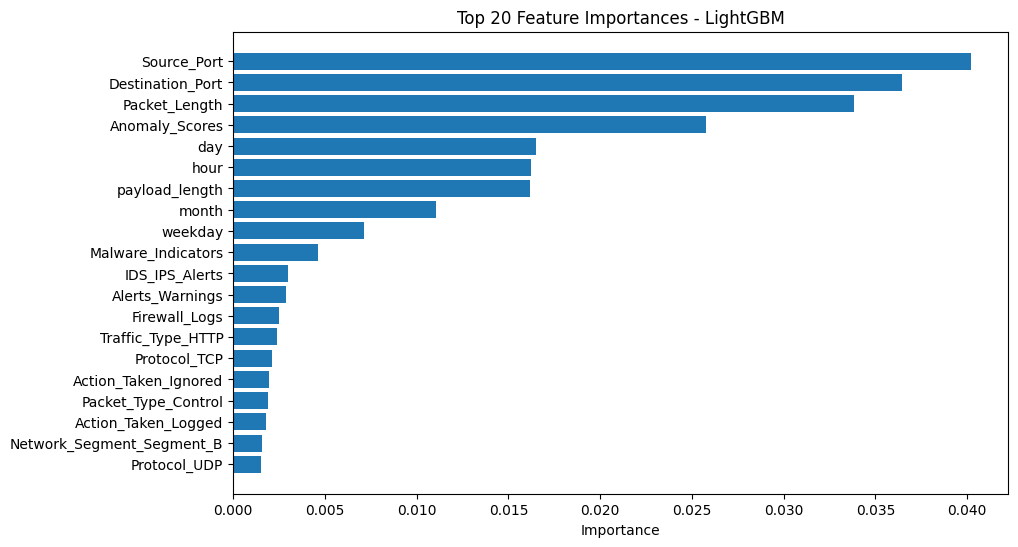

In [32]:
# Get feature importances from the trained LightGBM model
importances = lgbm.feature_importances_
importances_normalized = importances / importances.sum()

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances_normalized
}).sort_values(by='importance', ascending=False).head(20)

# Sort by importance and take the top 20
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.gca().invert_yaxis()  # highest importance on top
plt.title("Top 20 Feature Importances - LightGBM")
plt.xlabel("Importance")
plt.show()


### 4. Retrain the model

4.1. Features Selection

In [33]:
top_features = feat_imp_df['feature'].head(20).tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

lgbm.fit(X_train_top, y_train)
y_pred_top = lgbm.predict(X_test_top)


[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 20
[LightGBM] [Info] Start training from score -1.091575
[LightGBM] [Info] Start training from score -1.103750
[LightGBM] [Info] Start training from score -1.100552
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0


4.2. Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

param_grid = {
    'num_leaves': [7, 15, 31],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid = GridSearchCV(
    LGBMClassifier(
        random_state=42,
        verbose=-1   # suppress info messages
    ),
    param_grid,
    cv=3,
    scoring='accuracy'
)


grid.fit(X_train_top, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 15}


4.3. Model Evaluation

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_final = grid.best_estimator_.predict(X_test_top)
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))


Accuracy: 0.33775
              precision    recall  f1-score   support

        DDoS       0.35      0.35      0.35      2686
   Intrusion       0.34      0.35      0.34      2653
     Malware       0.33      0.32      0.32      2661

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000

[[931 888 867]
 [839 919 895]
 [883 926 852]]


4.4. Deployment / Saving Model

In [36]:
import joblib
joblib.dump(lgbm, 'attack_type_model.pkl')


['attack_type_model.pkl']